# Forbidden z region

In [1]:
import molsysmt as msm

In [2]:
import openmm as mm
from openmm import unit
from openmm import app
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
system = mm.System()
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
msm.thirds.openmm.forces.forbidden_z_region(system, force_constant = '500 kilojoules/(mol*angstroms**2)',
                                          pbc=True, adding_force=True)

0

In [5]:
# Formalismo NVT
temperature = 300*unit.kelvin
pressure    = None

In [6]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 1.00*unit.picoseconds
simulation_time = 250.*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

In [7]:
friction   = 5.0/unit.picoseconds
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

In [8]:
platform = mm.Platform.getPlatformByName('CPU')

In [9]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

In [10]:
initial_positions  = [[0.0, 0.0, 2.0]] * unit.nanometers

In [11]:
context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)

In [12]:
L = 4.0
v1 = [L,0,0] * unit.nanometers
v2 = [0,L,0] * unit.nanometers
v3 = [0,0,L] * unit.nanometers
L = L * unit.nanometers
context.setPeriodicBoxVectors(v1, v2, v3)

In [13]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [14]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [15]:
for ii in tqdm(range(1,num_saving_steps)):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:40<00:00,  6.16it/s]


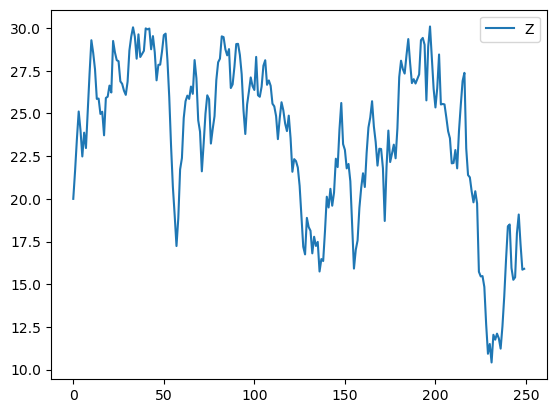

In [16]:
#plt.plot(positions[:,0], label='X')
#plt.plot(positions[:,1], label='Y')
plt.plot(positions[:,2], label='Z')
plt.legend()
plt.show()